# Curso: Data Science: analise e visualização de dados.

Curso de introdução à análise de dados usando a técnica **Exploratory Data Analysis (EDA)**.

Página do curso: https://cursos.alura.com.br/course/data-science-primeiros-passos

Site de busca de Datasets: [Dataset Search](https://datasetsearch.research.google.com/)

## Analisando as notas em geral

Importa a biblioteca `Pandas` e carrega o CSV com notas de filmes `ratings.csv`.

In [2]:
import pandas as pd

notas = pd.read_csv('ml-latest-small/ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


`DataFrame.shape` retorna uma tupla com a dimensão da matriz, sendo o primeiro valor, o número de linhas e o segundo, o número de colunas.

In [3]:
notas.shape

(100836, 4)

`DataFrame.columns` renomeia os nomes das colunas da matriz.

In [4]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

`DataFrame.unique()` retorna os valores de uma coluna uma única vez.

In [6]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

`DataFrame.value_counts()` retorna uma série com os valores contidos em uma coluna e o número de vezes em que eles se repetem.

In [7]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

`DataFrame.mean()` retorna a média de uma coluna.

`DataFrame.median()` retorna a mediana de uma coluna. Mediana é a divisão dos dados em que 50% deles ficam acima dela o os outros 50% abaixo.

In [8]:
print('Média: ' + str(notas['nota'].mean()))
print('Mediana: ' + str(notas.nota.median()))

Média: 3.501556983616962
Mediana: 3.5


In [9]:
notas.nota

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [10]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

`DataFrame.plot(kind='hist')` este método plota um histograma. O atributo `kind='hist'` serve justamente para dizer para o Pandas que o tipo de gráfico desejado é um histograma.

<AxesSubplot: ylabel='Frequency'>

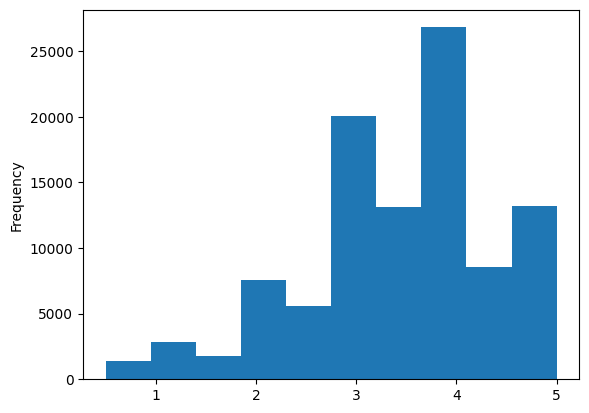

In [11]:
notas.nota.plot(kind = 'hist')

`DataFrame.describe()` traz alguns dados estatísticos da matriz em questão, sendo os seguintes:

| Estatística | Descrição |
| :-- | --- |
| count | Conta as celulas não `NA` de cada coluna ou linha |
| mean | Média dos valores |
| std | Desvio padrão. (variação em relação à média). |
| min | O menor valor da coluna ou linha. |
| 25% | Primeiro Quartil, ou seja, 25% dos dados estão abaixo deste valor. |
| 50% | Mediana, que é a divisão dos dados em que 50% deles ficam acima dela o os outros 50% abaixo. |
| 75% | Terceiro Quartil, ou seja, 75% dos dados estão abaixo deste valor. |
| max | O maior valor da coluna ou linha. |

In [12]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [13]:
import seaborn as sns

`sns.boxplot()` Plota um gráfico de caixa, gerando uma representação visual sobre a distribuição do conjunto de dados, incluindo a mediana, quartis e outliers.

`Outliers` por sua vez são valores fora do padrão da distribuição esperada, sendo exibidos como pontos fora da caixa principal do gráfico.

<AxesSubplot: >

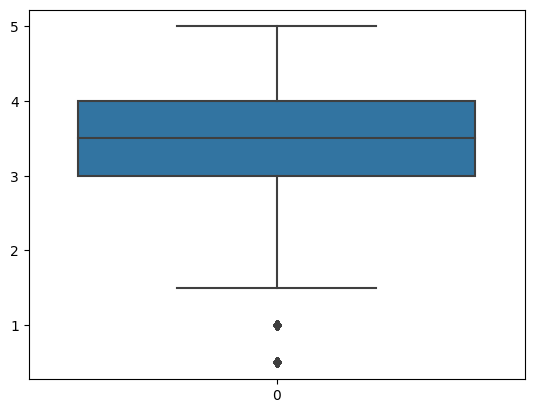

In [14]:
sns.boxplot(notas.nota)

## Olhando filmes

Carrega o arquivo `movies.csv` que contem dados dos filmes e renomeia as colunas.

In [15]:
filmes = pd.read_csv('ml-latest-small/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Analisando algumas notas específicas por filme

`DataFrame.query()` permite fazer consultas complexas em um `DataFrame` podendo usar condicionais nas consultas.

In [17]:
notas.query('filmeId==1').nota.mean()

3.9209302325581397

In [18]:
notas.query('filmeId==2').nota.mean()

3.4318181818181817

`DataFrame.groupby()` agrupa os dados de acordo com o valor das colunas especificadas. No código abaixo, é agrupado as notas por `filmeId` e depois retornado a média de notas para cada filme.

In [19]:
medias_por_filme = notas.groupby('filmeId').nota.mean()
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot: ylabel='Frequency'>

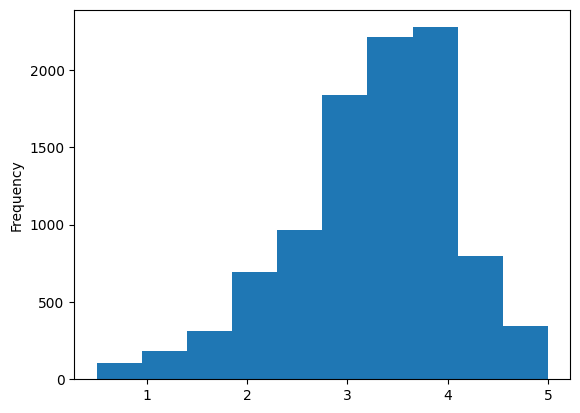

In [20]:
medias_por_filme.plot(kind='hist')

Importa o `Matplotlib` para poder fazer ajustes na tabela. Matplotlib é a biblioteca usada pelo Pandas e seaborn para gerar os gráficos.

`plt.figure()` Este método permite fazer uma série de ajustes no gráfico que será gerado. Neste caso é passado o atributo `figsize` que especifica o tamanho do gráfico.

<AxesSubplot: ylabel='nota'>

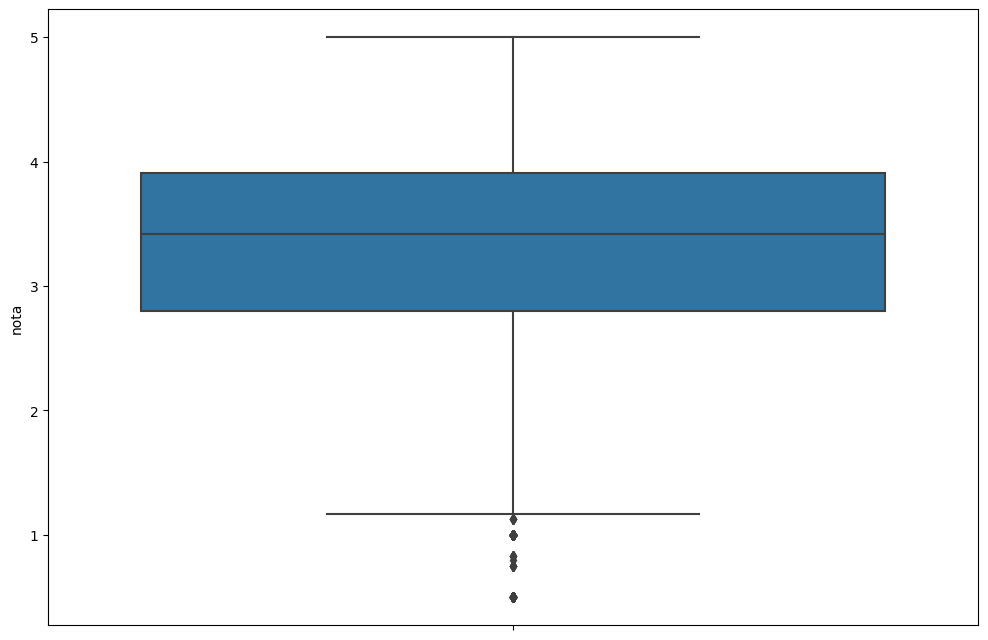

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.boxplot(y=medias_por_filme)

In [22]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

`sns.displot()` Segundo a documentação: 

> Esta função fornece acesso a várias abordagens para visualizar a distribuição univariada ou bivariada de dados, incluindo subconjuntos de dados definidos por mapeamento semântico e facetamento em vários subplots. O kindparâmetro seleciona a abordagem a ser usada:
>
> - histplot()(com kind="hist"; o padrão)
>
> - kdeplot()(com kind="kde")
>
> - ecdfplot()(com kind="ecdf"; somente univariado)
>
> -- <cite>https://seaborn.pydata.org/generated/seaborn.displot.html</cite>

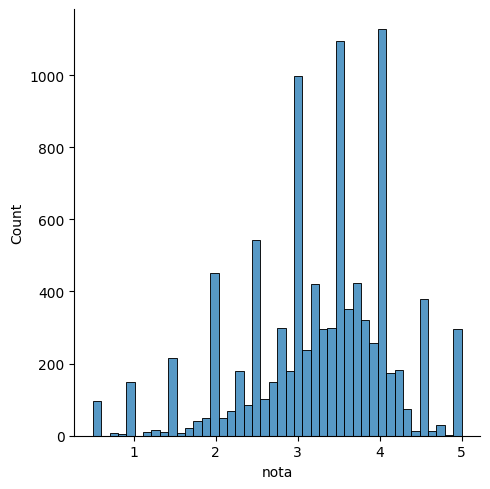

In [23]:
# sns.displot(medias_por_filme, bins=10) bins dá o número de barrinhas que aparece
sns.displot(medias_por_filme)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

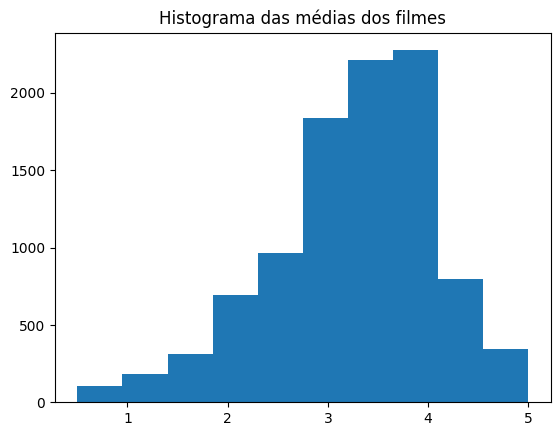

In [24]:
plt.hist(medias_por_filme)
plt.title('Histograma das médias dos filmes')

In [25]:
tmdb = pd.read_csv('tmdb-5000/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [26]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [27]:
tmdb.original_language

0       en
1       en
2       en
3       en
4       en
        ..
4798    es
4799    en
4800    en
4801    en
4802    en
Name: original_language, Length: 4803, dtype: object

In [28]:
tmdb.original_language.value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

`DataFrame.index` retorna apenas os indices de uma série. Combinada com o `value_counts()` que conta as ocorrências de valor, ele retorna o indice, que no `DataFrame` é o valor.

In [29]:
tmdb.original_language.value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object')

`DataFrame.value` Similar ao anterior, mas aqui, retorna o número de ocorrências.

Lembre-se de que ao usar o `value_counts()`, é gerado uma serie em que o indice são os valores da coluna, enquanto os valores são a contagem de vezes em que eles aparecem. 

`Series` na prática são `array`, mas o pessoal de python adora ficar dando nome diferente pras coisas só por causa de algum detalhe.

In [30]:
tmdb.original_language.value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

`array.to_frame()` Converte uma série para `DataFrame`.

`DataFrame.reset_index()` Reseta o indice (***Ah Vah***).

É possível também atribuir como index uma das colunas existentes da sequinte forma:
```py
contagem_de_lingua.set_index('original_language', inplace=True)
```

O `inplace` serve para sobreescrever os dados da variável atual com a operação desejada, você só não precisa passá-lo quando a operação será salva em outra variável, como é o caso do `reset_index()` no código abaixo.

In [31]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']

In [32]:
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<AxesSubplot: xlabel='original_language', ylabel='total'>

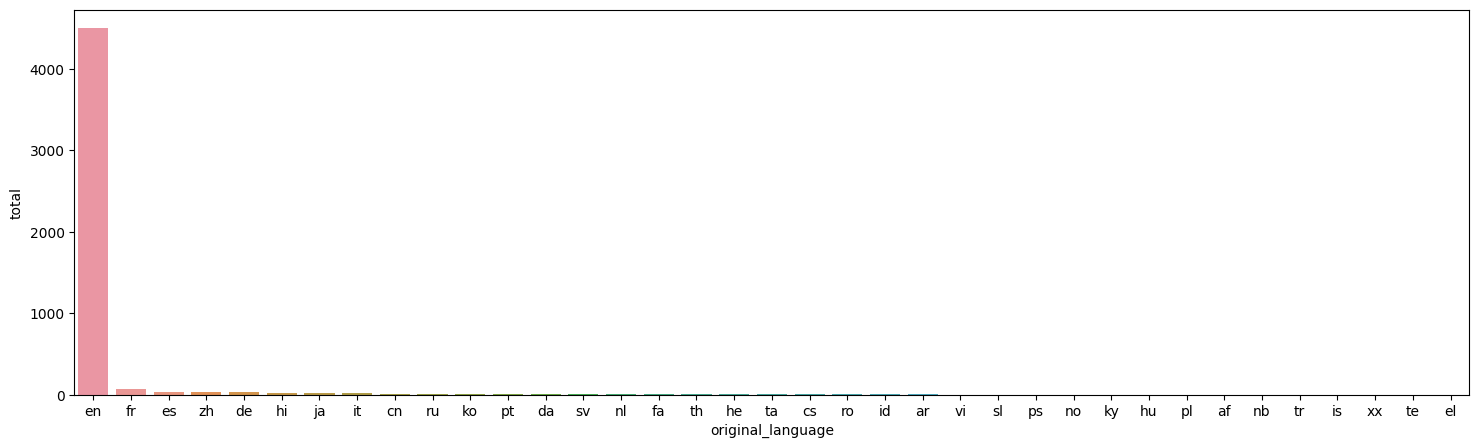

In [33]:
plt.figure(figsize=(18,5))
sns.barplot(x="original_language", y="total", data=contagem_de_lingua)

Alguns tipos de gráficos tem alguma coisa diferente que não funciona com `plt.figure()`, como é o caso deste abaixo, porém dá para ajustar a largura dele usando o parâmetro `aspect`, sendo que **1** é equivalente ao height, **2** o dobro de largura e assim por diante.

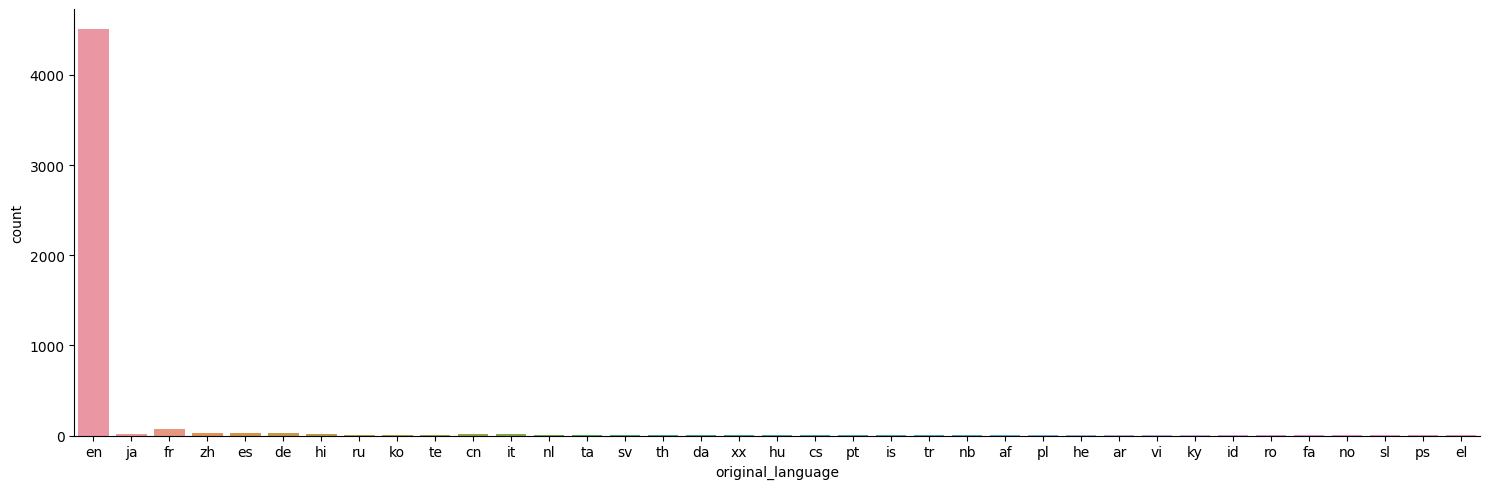

In [34]:
sns.catplot(x = "original_language",kind="count", data = tmdb, aspect=3)

([<matplotlib.patches.Wedge at 0x7f795b2f5190>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

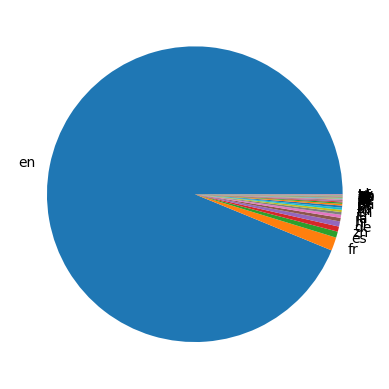

In [35]:
plt.pie(contagem_de_lingua.total, labels = contagem_de_lingua.original_language)

O código abaixo é para separar os números de filmes em inglês dos demais idiomas.

In [36]:
total_por_lingua = tmdb.original_language.value_counts()
total_geral = total_por_lingua.sum()
total_ingles = total_por_lingua.loc['en']
total_resto = total_geral - total_ingles

print(total_ingles, total_resto)

4505 298


In [37]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_ingles, total_resto]
}
dados

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

In [38]:
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


<AxesSubplot: xlabel='lingua', ylabel='total'>

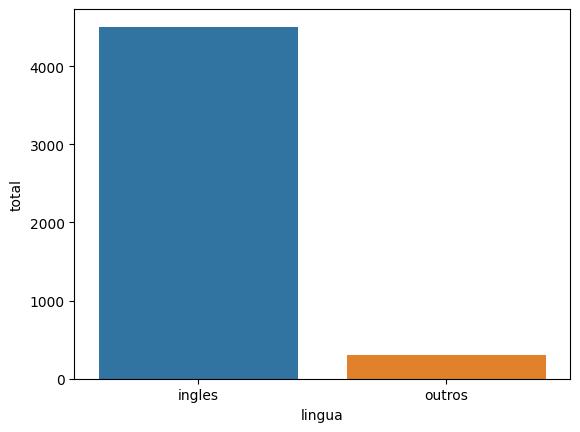

In [39]:
sns.barplot(x = 'lingua', y = 'total', data = dados)

([<matplotlib.patches.Wedge at 0x7f795b1bb8e0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

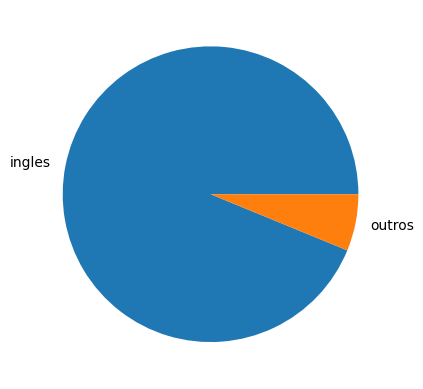

In [40]:
plt.pie(dados.total, labels=dados.lingua)

In [41]:
total_lingua_outros =  tmdb.query('original_language != "en"')
total_lingua_outros_conta = total_lingua_outros.original_language.value_counts()
total_lingua_outros_conta

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

A mudança aqui para os outros gráficos é a adição do parâmetro `palette` com a paleta de cores magma. O objetivo é que a variação de cores indique uma constância começando pelo maior valor sendo mais escuro e os menores mais claros.

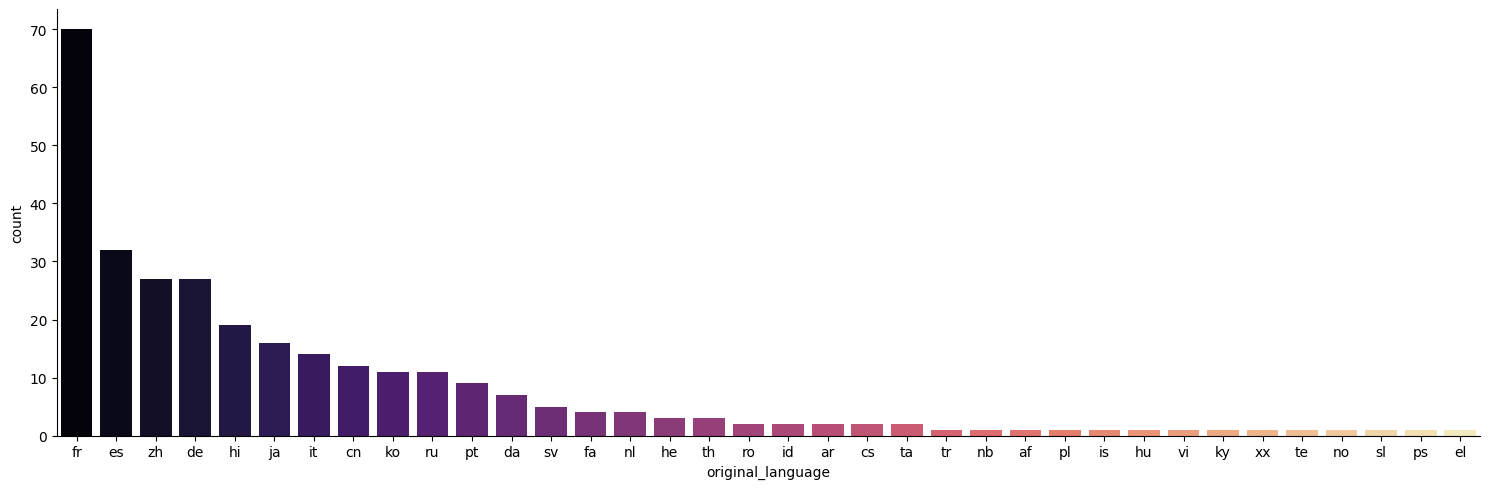

In [42]:
sns.catplot(x = 'original_language', kind = 'count', data = total_lingua_outros, order = total_lingua_outros_conta.index, aspect = 3, palette = 'magma')

## Revisando o papel da média, mediana, medidas de tendência central, dispersão, desvio padrão, box-plot, histograma

O objetivo deste capítulo é mostrar que é preciso identificar quais tipos de dados trazem insights reais do dataset, há exemplos aqui de que a média e mediana entregam valores muito parecidos mesmo tendo distribuições totalmente diferentes de um exemplo para o outro, portanto é preciso saber pinçar os dados para apresentar estatísticas que fazem sentido.

In [43]:
dados_outros = {
    'lingua' : total_lingua_outros_conta.index,
    'total' : total_lingua_outros_conta.values
}
dados_outros = pd.DataFrame(dados_outros)
dados_outros.head()

,lingua,total
0,fr,70
1,es,32
2,zh,27
3,de,27
4,hi,19


In [44]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [45]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [46]:
notas_toy_story =  notas.query('filmeId==1')
notas_jumanji =  notas.query('filmeId==2')
print(len(notas_toy_story), len(notas_jumanji))

215 110


In [47]:
print('Nota média do Toy Story %.2f' % notas_toy_story.nota.mean())
print('Nota média do Jumanji %.2f' % notas_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [48]:
print('Nota mediana do Toy Story %.2f' % notas_toy_story.nota.median())
print('Nota mediana do Jumanji %.2f' % notas_jumanji.nota.median())

Nota mediana do Toy Story 4.00
Nota mediana do Jumanji 3.50


In [49]:
import numpy as np

# np.array([2.5] *10).mean()
# np.array([3.5] *10)
filme1 = np.append(np.array([2.5] *10), np.array([3.5] *10))
filme2 = np.append(np.array([5] *10), np.array([1] *10))

In [50]:
print(notas_toy_story.nota.std(), notas_jumanji.nota.std())

0.8348591407114047 0.8817134921476455


In [51]:
print(filme1.mean(), filme2.mean())

3.0 3.0


In [52]:
print(np.median(filme1), np.median(filme2))

3.0 3.0


In [53]:
print(np.std(filme1), np.std(filme2))

0.5 2.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

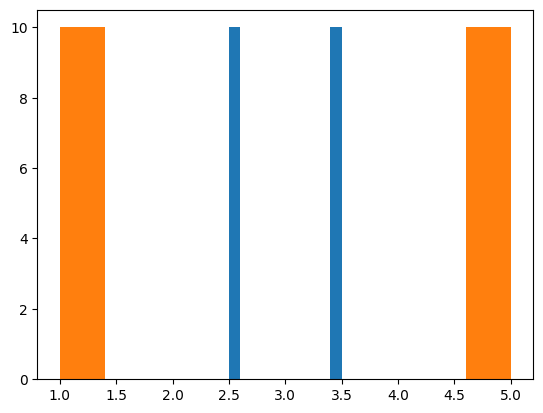

In [54]:
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f795b41aa30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f795b41a370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f795b32fb20>,
 'medians': [<matplotlib.lines.Line2D at 0x7f795b549c40>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f795b5492e0>,
 'means': []}

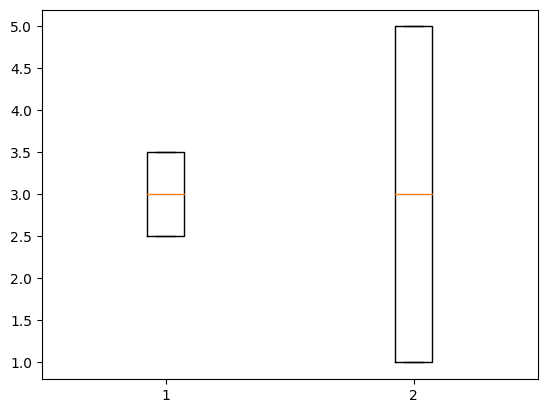

In [55]:
plt.boxplot([filme1, filme2])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f795aef1760>,
 'caps': [<matplotlib.lines.Line2D at 0x7f795aef1ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f795aef14c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f795aeff220>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f795aeff4c0>,
 'means': []}

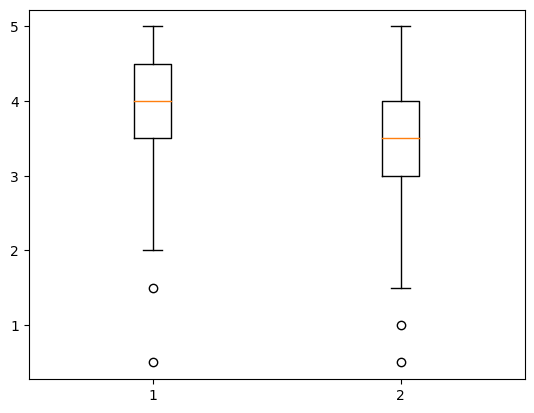

In [56]:
plt.boxplot([notas_toy_story.nota, notas_jumanji.nota])

<AxesSubplot: xlabel='filmeId', ylabel='nota'>

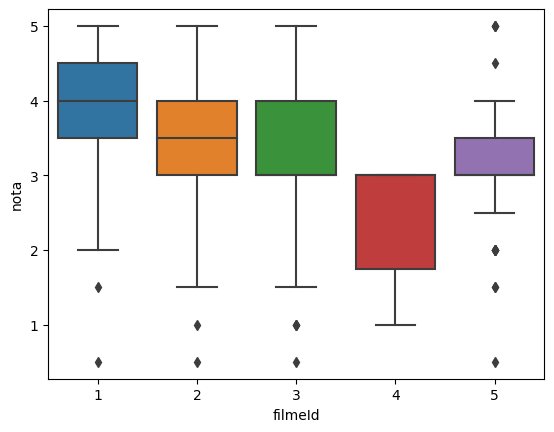

In [57]:
sns.boxplot(data = notas.query('filmeId in [1,2,3,4,5]'), x = 'filmeId', y = 'nota')